In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
% %matplotlib inline

UsageError: Line magic function `%` not found.


In [67]:
df=pd.read_csv("./survey_results_public.csv")

In [68]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print(df.shape)


(19102, 154)


In [73]:
len(df.columns.values)

154

In [74]:
no_nulls=set(df.columns[df.isnull().mean()==0])

In [75]:
set(df.columns[df.isnull().mean()==0])

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [76]:
set(df.columns[df.isnull().mean()>.75])

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

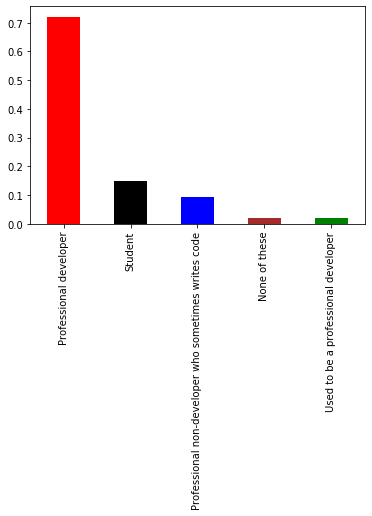

In [77]:
status_vals=df.Professional.value_counts()
(status_vals/df.shape[0]).plot(kind='bar',color=['red', 'black', 'blue', 'brown', 'green'])

In [78]:
status_vals

Professional developer                                  13774
Student                                                  2821
Professional non-developer who sometimes writes code     1782
None of these                                             368
Used to be a professional developer                       357
Name: Professional, dtype: int64

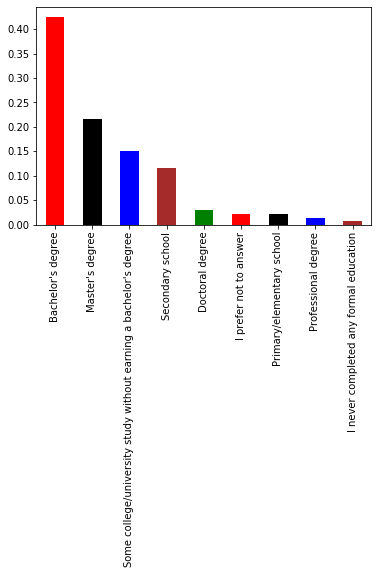

In [79]:
ed_vals=df.FormalEducation.value_counts()
(ed_vals/df.shape[0]).plot(kind='bar',color=['red', 'black', 'blue', 'brown', 'green'])

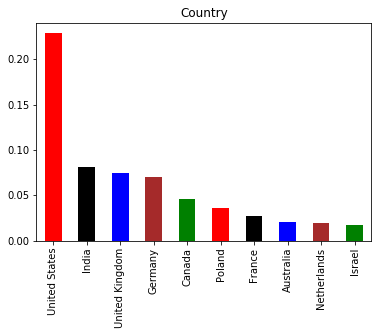

In [80]:
count_vals =df.Country.value_counts() #Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar",color=['red', 'black', 'blue', 'brown', 'green']);
plt.title("Country");

In [89]:
df2=pd.read_csv('./survey_results_schema.csv')


In [93]:
list(df2[df2.Column=='CousinEducation']['Question'])

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [178]:
study=df['CousinEducation'].value_counts().reset_index()
study.head()

,index,CousinEducation
0,Take online courses; Buy books and work throug...,192
1,None of these,167
2,Take online courses,158
3,Take online courses; Part-time/evening courses...,140
4,Take online courses; Bootcamp; Part-time/eveni...,132


In [179]:
study.rename(columns= {'index':'method','CousinEducation':'count'},inplace=True)

In [180]:
study.head()

,method,count
0,Take online courses; Buy books and work throug...,192
1,None of these,167
2,Take online courses,158
3,Take online courses; Part-time/evening courses...,140
4,Take online courses; Bootcamp; Part-time/eveni...,132


In [181]:
possible_vals=[s.split(';') for s in study.method]
possible_vals=[j for i in possible_vals for j in i]
possible_vals=(list(np.unique(possible_vals)))

In [183]:
count_vals =df.Country.value_counts()

In [175]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]


In [176]:
len(possible_vals)

13

In [185]:
from collections import Counter

In [ ]:
Counter(words).values()